In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/1.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

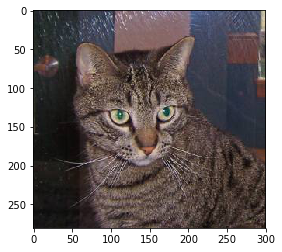

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(281, 300, 3)

In [6]:
dog = cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/96.jpg')

In [7]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

In [8]:
cat4.shape

(281, 300, 3)

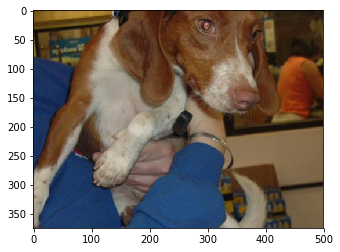

In [9]:
plt.imshow(dog)

In [10]:
dog.shape

(375, 500, 3)

In [11]:
dog.max()

255

In [12]:
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [13]:
img_gen = ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale = 1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

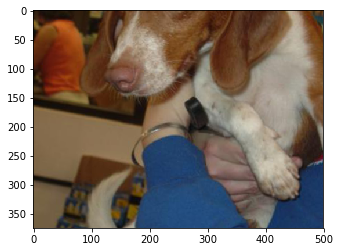

In [14]:
plt.imshow(img_gen.random_transform(dog))

In [15]:
img_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [16]:
input_shape=(150,150,3)

In [17]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [18]:
model = Sequential()

#Convolutional layers
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))    # prevents overfitting by turning off  (50%)

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [20]:
batch_size = 16
train_image_gen = img_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_image_gen = img_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
import warnings
warnings.filterwarnings('ignore')
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=152,validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/1
152/152 [==============================] - 301s 2s/step - loss: 0.6973 - acc: 0.5255 - val_loss: 0.6886 - val_acc: 0.5302


In [24]:
results.history['acc']

[0.5254934210526315]

In [25]:
from keras.models import load_model

In [27]:
new_model = load_model('cat_dog_100epochs.h5')

In [54]:
# predict image never seen before
dog_file = 'CATS_DOGS/CATS_DOGS/test/CAT/9967.jpg'

In [55]:
from keras.preprocessing import image

In [56]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [57]:
dog_img = image.img_to_array(dog_img)

In [58]:
dog_img.shape

(150, 150, 3)

In [59]:
import numpy as np

In [60]:
dog_img = np.expand_dims(dog_img,axis=0)

In [61]:
dog_img.shape

(1, 150, 150, 3)

In [62]:
dog_img = dog_img/255

In [63]:
model.predict_classes(dog_img)

array([[0]])

In [64]:
model.predict(dog_img)

array([[0.4956495]], dtype=float32)

In [65]:
# Since accuracy is less than 50% model predicted it as a cat